In [61]:
PROCESS_DATA_PATH = './data/Process/Processed_Heart.pkl'

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
heart = pd.read_pickle(PROCESS_DATA_PATH)
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_Ranges,Gender,ExerciseAngina_num
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,36-45,0,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,46-55,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,36-45,0,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,46-55,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,46-55,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,36-45,0,0
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,66-80,0,0
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,56-65,0,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,56-65,1,0


### First Thing Select Feature

In [63]:
features = ['Age', 'Gender', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina_num', 'ST_Slope']

In [64]:
dummies = pd.get_dummies(heart[features])
dummies

,Age,Gender,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina_num,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,0,140,289,0,172,0,0,1,0,0,0,1,0,0,0,1
1,49,1,160,180,0,156,0,0,0,1,0,0,1,0,0,1,0
2,37,0,130,283,0,98,0,0,1,0,0,0,0,1,0,0,1
3,48,1,138,214,0,108,1,1,0,0,0,0,1,0,0,1,0
4,54,0,150,195,0,122,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,0,132,0,0,0,0,1,0,1,0,0,1,0
914,68,0,144,193,1,141,0,1,0,0,0,0,1,0,0,1,0
915,57,0,130,131,0,115,1,1,0,0,0,0,1,0,0,1,0
916,57,1,130,236,0,174,0,0,1,0,0,1,0,0,0,1,0


In [65]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 918 non-null    int64  
 1   Sex                 918 non-null    object 
 2   ChestPainType       918 non-null    object 
 3   RestingBP           918 non-null    int64  
 4   Cholesterol         918 non-null    int64  
 5   FastingBS           918 non-null    int64  
 6   RestingECG          918 non-null    object 
 7   MaxHR               918 non-null    int64  
 8   ExerciseAngina      918 non-null    object 
 9   Oldpeak             918 non-null    float64
 10  ST_Slope            918 non-null    object 
 11  HeartDisease        918 non-null    int64  
 12  Age_Ranges          918 non-null    object 
 13  Gender              918 non-null    int64  
 14  ExerciseAngina_num  918 non-null    int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 107.7+ K

<AxesSubplot:>

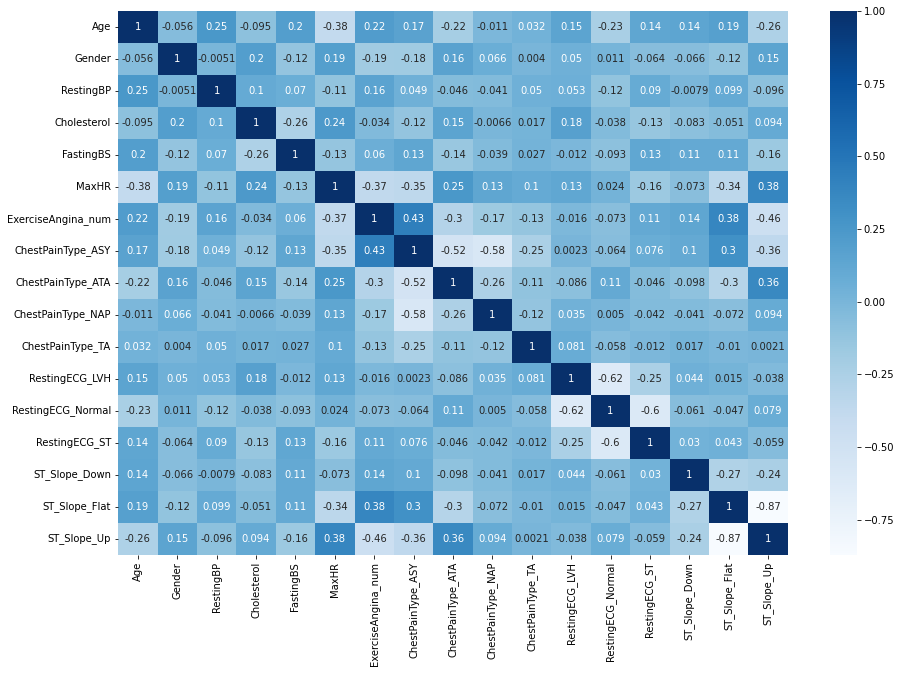

In [66]:
plt.figure(figsize=[15, 10])
sns.heatmap(dummies.corr(), cmap="Blues", annot=True)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = dummies
y = heart.HeartDisease.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=42)

First Model Logistic Regresstion

In [68]:
logistic = LogisticRegression(max_iter=1000)

logistic.fit(X_train, y_train);

res = logistic.predict(X_test)

print("ACC = {}".format(np.mean(res == y_test)))
print("Accurcy of Train = {}".format(logistic.score(X_train, y_train)))
print("Accurcy of Testing = {}".format(logistic.score(X_test, y_test)))


ACC = 0.8695652173913043
Accurcy of Train = 0.8535825545171339
Accurcy of Testing = 0.8695652173913043


Second Model KNC

In [69]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train, y_train)

print("Accurcy of Train = {}".format(knc.score(X_train, y_train)))
print("Accurcy of Testing = {}".format(knc.score(X_test, y_test)))

Accurcy of Train = 0.7850467289719626
Accurcy of Testing = 0.7101449275362319


C:\Users\Alien\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Alien\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [125]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold, LeaveOneOut, GroupKFold, cross_val_score
l = LeaveOneOut()
scores = cross_val_score(SVC(), X_train, y_train, cv=l) 
print("Cross-validation scores: {}".format(scores.mean()))
# s = SVC(kernel='linear')

# s.fit(X_train, y_train)

# print("Accurcy of Train = {}".format(s.score(X_train, y_train)))
# print("Accurcy of Testing = {}".format(s.score(X_test, y_test)))

Cross-validation scores: 0.7165109034267912


In [83]:
from sklearn.tree import DecisionTreeClassifier

r = DecisionTreeClassifier(max_depth=4)
r.fit(X_train, y_train)


print("Accurcy of Train = {}".format(r.score(X_train, y_train)))
print("Accurcy of Testing = {}".format(r.score(X_test, y_test)))

Accurcy of Train = 0.8691588785046729
Accurcy of Testing = 0.8586956521739131


In [105]:
from sklearn.ensemble import RandomForestClassifier

r = RandomForestClassifier(max_depth=7)
r.fit(X_train, y_train)


print("Accurcy of Train = {}".format(r.score(X_train, y_train)))
print("Accurcy of Testing = {}".format(r.score(X_test, y_test)))

Accurcy of Train = 0.9376947040498442
Accurcy of Testing = 0.8913043478260869


In [106]:
X_val, X_t, y_val, y_t = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [115]:
from sklearn.model_selection import KFold, GridSearchCV, LeaveOneOut
from sklearn.svm import SVC
k = KFold(n_splits=4)

para = [{'kernel':['linear'], 'C':[0.001, 0.01, 0.1, 1, 10, 100]}, 
{'kernel':['rbf'], 'C':[0.001, 0.01, 0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}]

grid = GridSearchCV(SVC(),param_grid=para, cv=k)

grid.fit(X_train, y_train)

print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

print("test = {}".format(grid.score(X_test, y_test)))


KeyboardInterrupt: 

In [116]:
print("test = {}".format(grid.score(X_test, y_test)))


NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.